<a href="https://colab.research.google.com/github/IrfanPavel/Suicide_Rate_Trend_Analysis/blob/main/Suicide_Rate_Trend_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<H1> Suicide Rate Trend Analysis**

The given dataset includes the following parameters:
* Country
* Year
* Sex
* Age
* Number of suicides
* Population
* Country-year
* HDI for year
* GDP for year
* GDP per capita
* Generation

**<h2> Importing the Libraries**

In [ ]:
#Import Of Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.simplefilter("ignore")

In [ ]:
data=pd.read_csv('master.csv')

In [4]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21.0,312900.0,6.71,Albania1987,NaN,"2,156,624,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000.0,5.19,Albania1987,NaN,"2,156,624,900",796.0,Silent
2,Albania,1987,female,15-24 years,14.0,289700.0,4.83,Albania1987,NaN,"2,156,624,900",796.0,Generation X
3,Albania,1987,male,75+ years,1.0,21800.0,4.59,Albania1987,NaN,"2,156,624,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300.0,3.28,Albania1987,NaN,"2,156,624,900",796.0,Boomers


In [5]:
data.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala'], dtype=object)

The next line helps display the variable type 

In [6]:
data.dtypes

country               object
year                   int64
sex                   object
age                   object
suicides_no          float64
population           float64
suicides/100k pop    float64
country-year          object
HDI for year         float64
 gdp_for_year         object
gdp_per_capita       float64
generation            object
dtype: object

Next line gives us a concise summary of the dataframe.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11009 entries, 0 to 11008
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            11009 non-null  object 
 1   year               11009 non-null  int64  
 2   sex                11009 non-null  object 
 3   age                11008 non-null  object 
 4   suicides_no        11008 non-null  float64
 5   population         11008 non-null  float64
 6   suicides/100k pop  11008 non-null  float64
 7   country-year       11008 non-null  object 
 8   HDI for year       3340 non-null   float64
 9    gdp_for_year      11008 non-null  object 
 10  gdp_per_capita     11008 non-null  float64
 11  generation         11008 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 1.0+ MB


**<h2> Exploratory Data Analysis**

In [8]:
#Data Cleaning
data["gdp_for_year"]=data[" gdp_for_year"]

In [9]:
data.drop(" gdp_for_year",axis=1,inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11009 entries, 0 to 11008
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            11009 non-null  object 
 1   year               11009 non-null  int64  
 2   sex                11009 non-null  object 
 3   age                11008 non-null  object 
 4   suicides_no        11008 non-null  float64
 5   population         11008 non-null  float64
 6   suicides/100k pop  11008 non-null  float64
 7   country-year       11008 non-null  object 
 8   HDI for year       3340 non-null   float64
 9   gdp_per_capita     11008 non-null  float64
 10  generation         11008 non-null  object 
 11  gdp_for_year       11008 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 1.0+ MB




gdp_for_year is numerical feature, but due to comma seperated number it is stored as string


In [11]:
data["gdp_for_year"]=data.gdp_for_year.str.replace(",","")

In [12]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_per_capita,generation,gdp_for_year
0,Albania,1987,male,15-24 years,21.0,312900.0,6.71,Albania1987,NaN,796.0,Generation X,2156624900
1,Albania,1987,male,35-54 years,16.0,308000.0,5.19,Albania1987,NaN,796.0,Silent,2156624900
2,Albania,1987,female,15-24 years,14.0,289700.0,4.83,Albania1987,NaN,796.0,Generation X,2156624900
3,Albania,1987,male,75+ years,1.0,21800.0,4.59,Albania1987,NaN,796.0,G.I. Generation,2156624900
4,Albania,1987,male,25-34 years,9.0,274300.0,3.28,Albania1987,NaN,796.0,Boomers,2156624900


In [13]:
data["gdp_for_year"]=data["gdp_for_year"].astype(float)

**<h3>Count Plot for Generations**

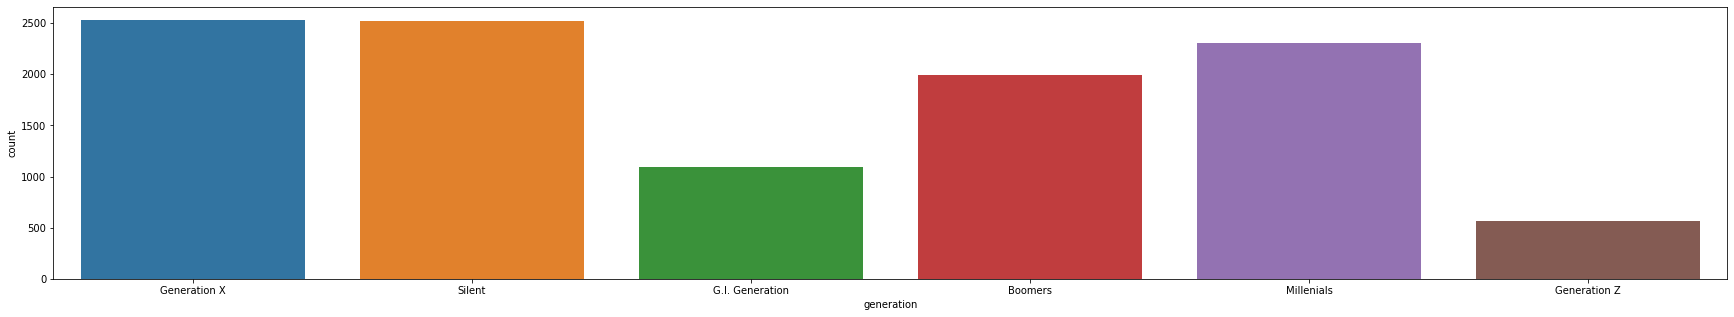

In [14]:
plt.figure(figsize=(30,5))
sns.countplot(data['generation'])

**<h2> Label Encoding**

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder1=LabelEncoder()
data["sex"]=label_encoder1.fit_transform(data["sex"])

In [16]:
label_encoder2=LabelEncoder()
data["generation"]=label_encoder2.fit_transform(data["generation"])

In [17]:
data=data.fillna(0)

In [18]:
data.drop(columns=["country","country-year","age"],axis=1,inplace=True)

In [19]:
data.head()

,year,sex,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita,generation,gdp_for_year
0,1987,2,21.0,312900.0,6.71,0.0,796.0,2,2.156625e+09
1,1987,2,16.0,308000.0,5.19,0.0,796.0,5,2.156625e+09
2,1987,0,14.0,289700.0,4.83,0.0,796.0,2,2.156625e+09
3,1987,2,1.0,21800.0,4.59,0.0,796.0,1,2.156625e+09
4,1987,2,9.0,274300.0,3.28,0.0,796.0,0,2.156625e+09


**<h3> Comparing Number of Suicides Between Both the Sexes**

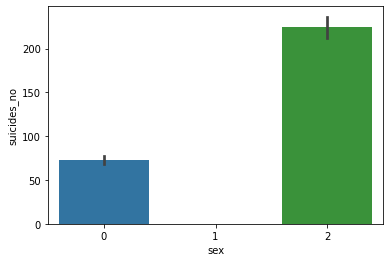

In [20]:
sns.barplot(x='sex',y='suicides_no',data=data)

**<h3>GDP trend over the given years**

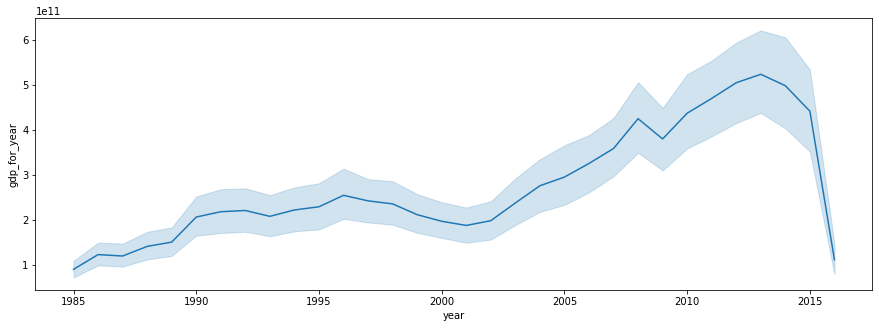

In [21]:
plt.figure(figsize=(15,5))
sns.lineplot(x='year',y='gdp_for_year',data=data)

**<h3> Suicide rate over the given period between both the genders**

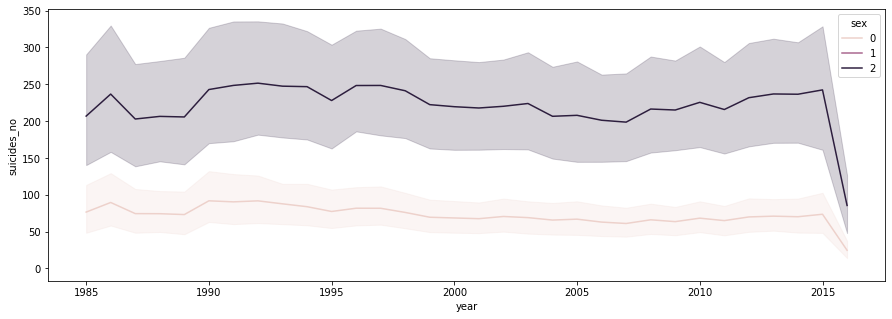

In [22]:
plt.figure(figsize=(15,5))
sns.lineplot(x='year',y='suicides_no',hue='sex',data=data)

In [23]:
data.dtypes

year                   int64
sex                    int64
suicides_no          float64
population           float64
suicides/100k pop    float64
HDI for year         float64
gdp_per_capita       float64
generation             int64
gdp_for_year         float64
dtype: object

**<h3>Using Correlation heatmap to find important features and their relations with other features.**

In [24]:
#Correlation Matrix
data.corr()

,year,sex,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita,generation,gdp_for_year
year,1.000000,0.000427,-0.014910,0.005858,-0.058530,0.352463,0.361837,0.268913,0.167337
sex,0.000427,1.000000,0.211562,-0.009763,0.378369,0.000386,-0.000265,-0.000039,-0.000140
suicides_no,-0.014910,0.211562,1.000000,0.588062,0.340770,0.033074,0.196956,-0.101917,0.566878
population,0.005858,-0.009763,0.588062,1.000000,-0.025734,0.031614,0.061976,-0.068006,0.565370
suicides/100k pop,-0.058530,0.378369,0.340770,-0.025734,1.000000,0.004758,0.109885,-0.057239,0.081031
HDI for year,0.352463,0.000386,0.033074,0.031614,0.004758,1.000000,0.225196,0.047267,0.143194
gdp_per_capita,0.361837,-0.000265,0.196956,0.061976,0.109885,0.225196,1.000000,0.090030,0.512263
generation,0.268913,-0.000039,-0.101917,-0.068006,-0.057239,0.047267,0.090030,1.000000,0.036811
gdp_for_year,0.167337,-0.000140,0.566878,0.565370,0.081031,0.143194,0.512263,0.036811,1.000000


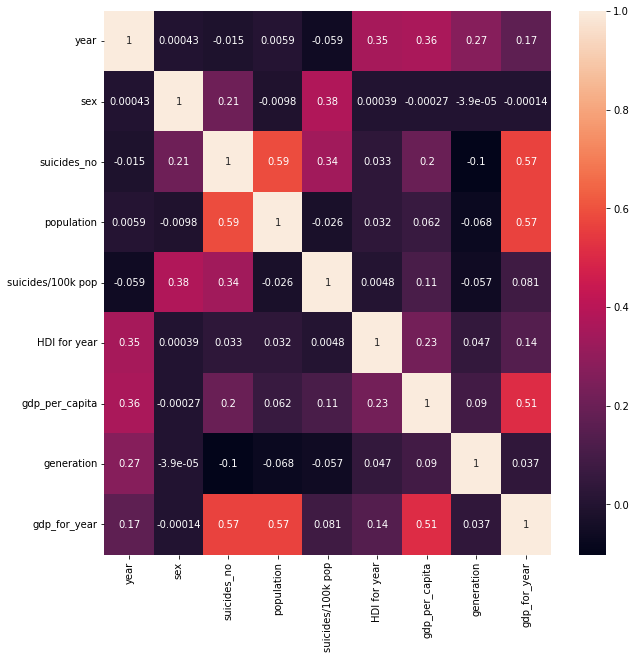

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [26]:
#Train and Test Data
train=data.drop("suicides_no",axis=1)
test=data["suicides_no"]

**<h3> Density Plot for population**

In [27]:
sns.set_style('whitegrid') 	

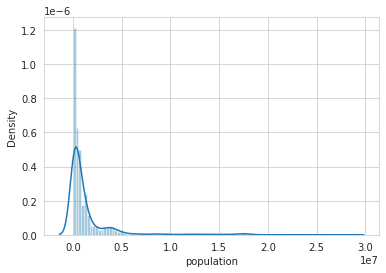

In [28]:
sns.distplot(train['population'],bins=100)

**<h3> Studying Trends between Year and Suicide Numbers**

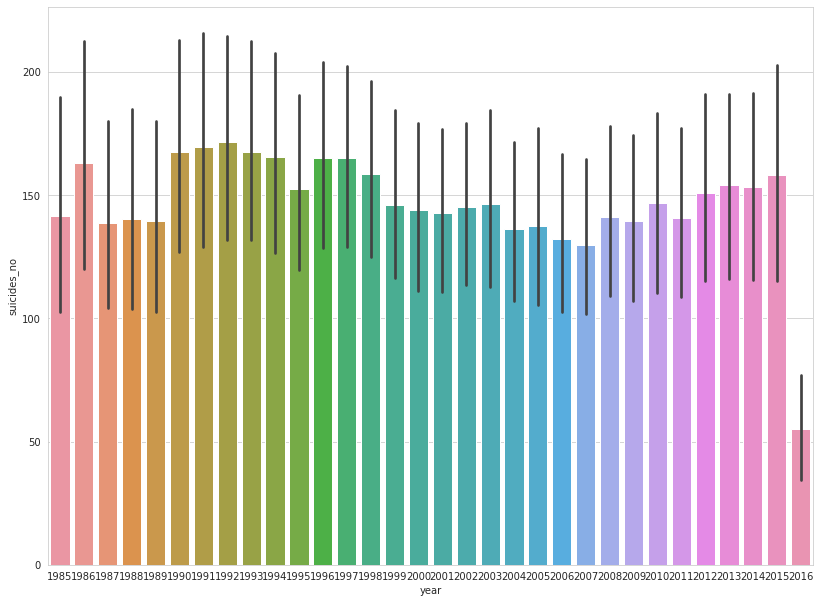

In [31]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(13.7, 10.27)
sns.barplot(x='year',y='suicides_no',data=data,ax=ax)

**<h3> Studying Trends between Year and Population**

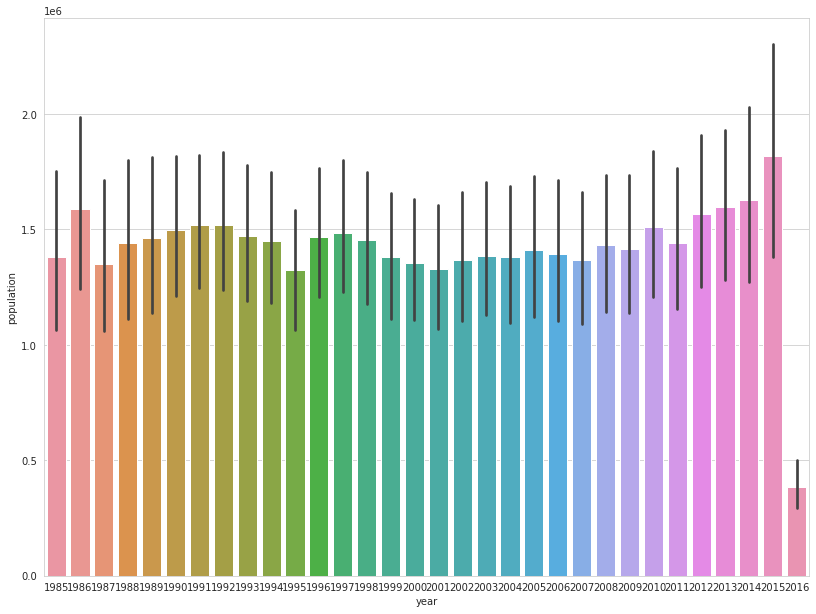

In [32]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(13.7, 10.27)
sns.barplot(x='year',y='population',data=train) 	

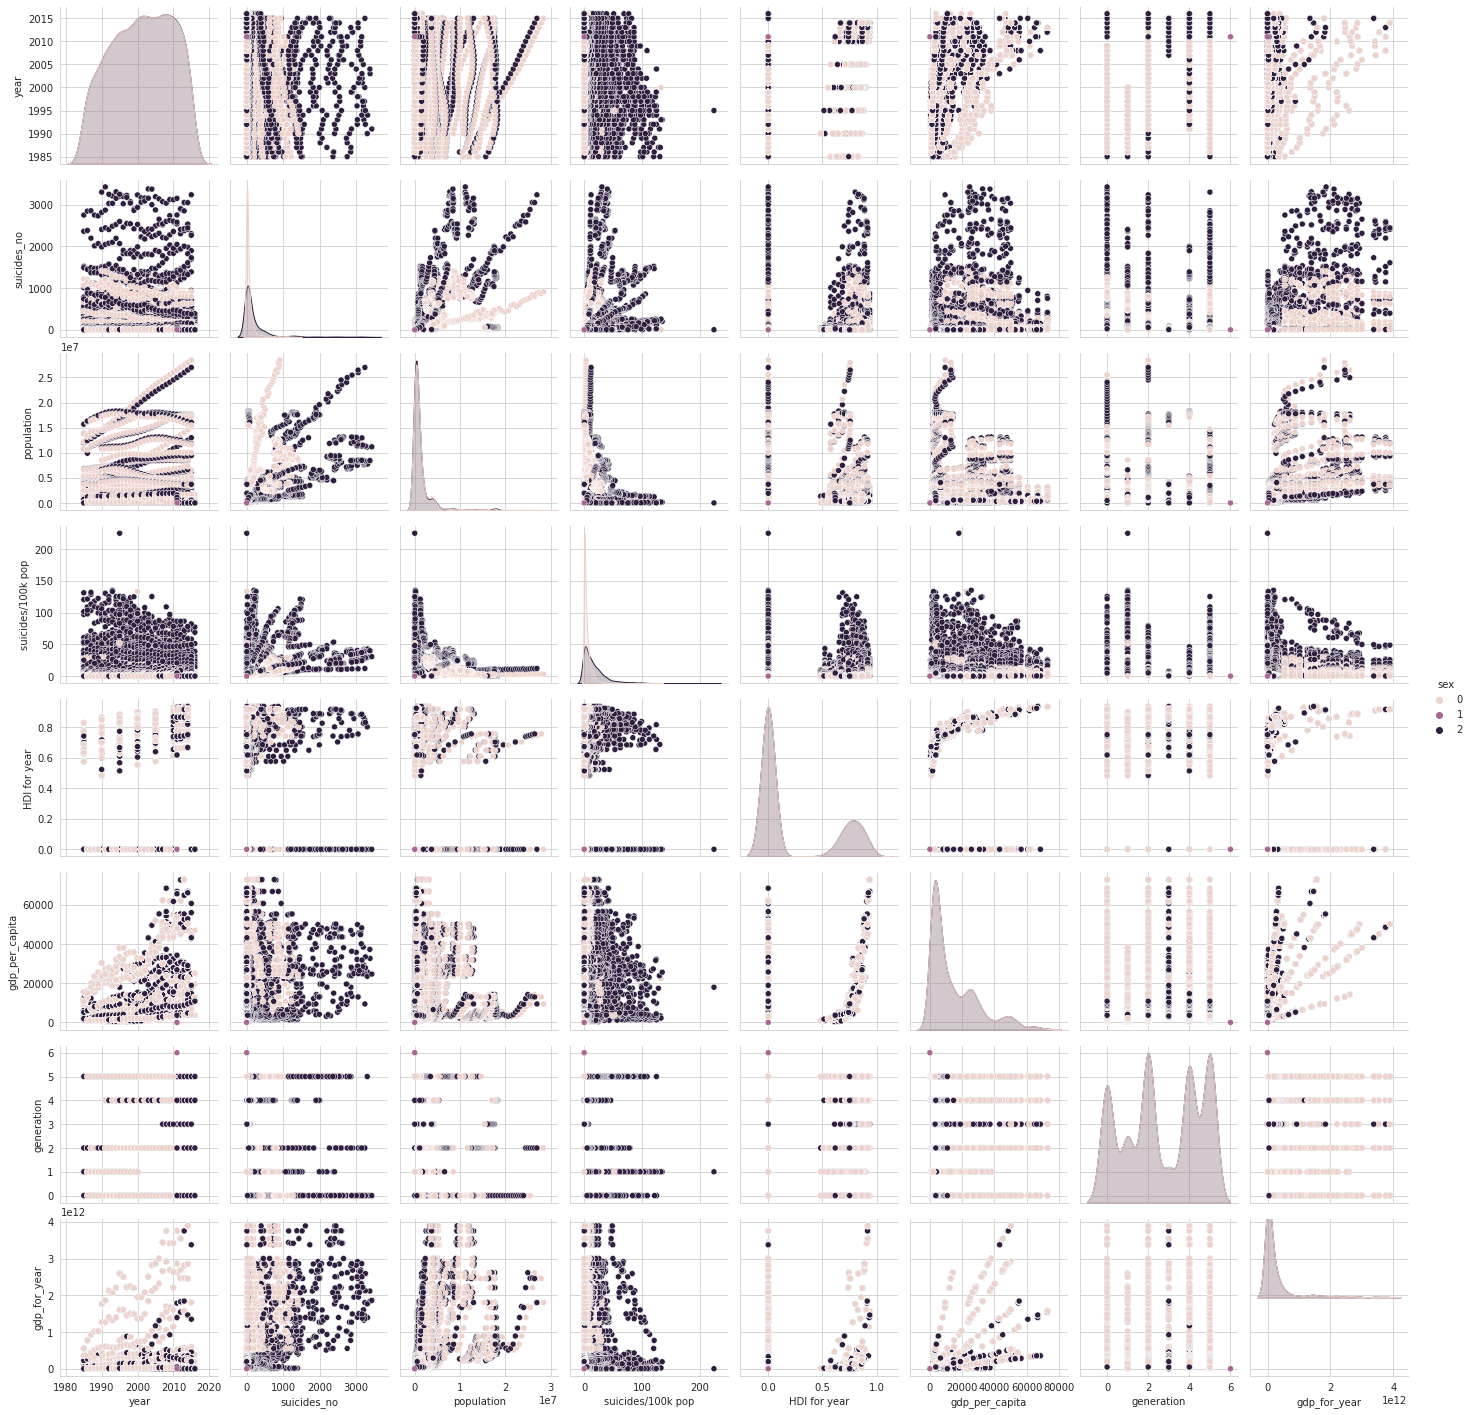

In [33]:
#Analysis Of all feautres 
sns.pairplot(data,hue="sex")

**<h2> Machine Learning Model**

**<h3> Splitting Training and Test Data**

We import model selection from sklearn to split the data into the training and test sets.

In [34]:
#Library for Training Model
from sklearn import model_selection

In [35]:
#Train Test Split
x_train,x_test,y_train,y_test=model_selection.train_test_split(train,test)

**<h3> Importing Algorithms**

The following algorithms will be tested on the given dataset and the one with the best performance would be declared suitable:
* Random Forest
* Decision Tree
* Linear Regression
* Support Vector Regression


In [36]:
#Training will be done by RandomForest Algorithm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

**<h4> Testing on Random Forest Regressor**

Given Estimators are 50 and the criterion being used is Mean Squared Error.

In [37]:
alg1=RandomForestRegressor(n_estimators=50,random_state=0,criterion="mse")
alg1.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', n_estimators=50, random_state=0)

**<h4> Testing on Decision Tree Regressor**



In [38]:
alg2=DecisionTreeRegressor()
alg2.fit(x_train,y_train)

DecisionTreeRegressor()

**<h4> Testing on Linear Regressor**

In [39]:
alg3=LinearRegression()
alg3.fit(x_train,y_train)

LinearRegression()

**<h4> Testing on Support Vector Regressor**

In [40]:
alg4=SVR()
alg4.fit(x_train,y_train)

SVR()

**<h4> Predicting the y values from our given models**

In [41]:
#Prediction
y_pred_1=alg1.predict(x_test)
y_pred_2=alg2.predict(x_test)
y_pred_3=alg3.predict(x_test)
y_pred_4=alg4.predict(x_test)

**<h4> Calculating and Printing the accuracy**

In [42]:
from sklearn import metrics

In [43]:
print("Random Forest RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred_1)))
print("Decesion Tree RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred_2)))
print("Linear Regression RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred_3)))
print("SVR RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred_4)))

Random Forest RMSE: 18.8078422715561
Decesion Tree RMSE: 25.465973394795345
Linear Regression RMSE: 252.90112842729457
SVR RMSE: 341.16213310871404
